# Contents

* 1.Loading the data
* 2.Preparing the data
* 3.Building our Network
    * 3.1 The model definition
    * 3.2 Compiling the model
    * 3.3 Validating our approach
    * 3.4 Training the model
    * 3.5 Plotting the training and the validation loss
    * 3.6 Plotting the training and the validation accuracy
    * 3.7 Retraining a model from scratch
* 4.Wrapping up

In this Project, we’ll build a network to classify Reuters newswires into 46 mutually
exclusive topics. Because we have many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of *single-label*, multiclass classification.
If each data point could belong to multiple categories (in this case, topics), we’d be
facing a *multilabel*, multiclass classification problem.

# 1.Loading the data

We’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.
Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let’s
take a look

In [5]:
import keras

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 5s 2us/step


In [4]:
print('Number of training examples : ', len(train_data))
print('Number of test examples : ', len(test_data))

Number of training examples :  8982
Number of test examples :  2246


As for the imdb data, train_data is a list of list of integers. Let's decode the newswires into test

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 5s 10us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

the label associated with an example is an integer between 0 and 45—a topic index

In [10]:
train_labels[258]

3

# 2.Preparing the data

In [11]:
import numpy as np

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

one-hot encoding the labels

In [16]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

We could have simply use the built-in function to_categorical

* from keras.utils.np_utils import to_categorical
    * one_hot_train_labels = to_categorical(train_labels)
    * one_hot_test_labels = to_categorical(test_labels)

# 3.Building the network

In [17]:
from keras import models
from keras import layers

## 3.1 The model definition

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## 3.2 Compiling the model

In [36]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

## 3.3 Setting aside a validation set

In [37]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [38]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Now let's train the model with 20 epochs

## 3.4 Training the model

In [39]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
         validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/step - loss: 2.6434 - acc: 0.5253 - val_loss: 1.7688 - val_acc: 0.6320
Epoch 2/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.4293 - acc: 0.7088 - val_loss: 1.3314 - val_acc: 0.6980
Epoch 3/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.0529 - acc: 0.7838 - val_loss: 1.1422 - val_acc: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.8198 - acc: 0.8314 - val_loss: 1.0445 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.6519 - acc: 0.8643 - val_loss: 0.9779 - val_acc: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.5187 - acc: 0.8950 - val_loss: 0.9238 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.4165 - acc: 0.9138 - val_loss: 0.8973 - val_acc: 0.8100


## 3.5 Plotting the training and the validation loss

In [26]:
%matplotlib inline

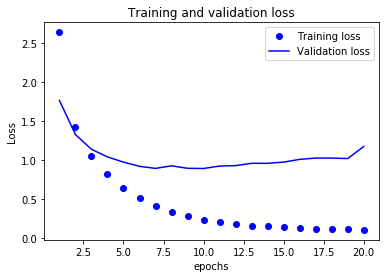

In [40]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss,'bo',label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3.6 Plotting training and validation accuracy

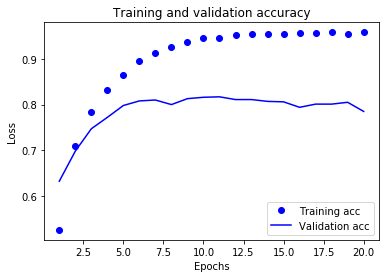

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can notice that the model is overfitting after 9 epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

##  3.7 Retraining a model from scratch

In [42]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9,batch_size=512,
                            validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 174us/step - loss: 2.5500 - acc: 0.5001 - val_loss: 1.6881 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 142us/step - loss: 1.3822 - acc: 0.7117 - val_loss: 1.2881 - val_acc: 0.7260
Epoch 3/9
7982/7982 [==============================] - 1s 143us/step - loss: 1.0233 - acc: 0.7855 - val_loss: 1.1282 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 142us/step - loss: 0.8019 - acc: 0.8277 - val_loss: 1.0231 - val_acc: 0.7800
Epoch 5/9
7982/7982 [==============================] - 1s 145us/step - loss: 0.6409 - acc: 0.8677 - val_loss: 0.9643 - val_acc: 0.8050
Epoch 6/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.5114 - acc: 0.8916 - val_loss: 0.9380 - val_acc: 0.7940
Epoch 7/9
7982/7982 [==============================] - 1s 143us/step - loss: 0.4098 - acc: 0.9141 - val_loss: 0.9105 - val_acc: 0.8220
Epoch 8

In [43]:
results

[0.9969432271174417, 0.784060552092609]

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:

In [44]:
import copy

In [45]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(sum(hits_array)/len(test_labels))

0.19456812110418523

## 3.8 Generating Predictions on new data

In [47]:
predictions = model.predict(x_test)

Each entry in predictions is a vector of length 46:

In [48]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [49]:
np.sum(predictions[0])

0.99999994

The largest entry is the predicted class—the class with the highest probability:

In [50]:
np.argmax(predictions[0])

3

# 4.Wrapping up

Here’s what we should take away from this example:
* If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
* In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification: – 
    * Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
    * Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.